# Data visualization of COVID19 epidemic

### Load libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import scipy
# np.__version__
%matplotlib inline
scipy.__version__

'1.4.1'

## Load data

In [97]:
# Johns Hopkins data
url='https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
filename_covid_timeseries='time_series_covid19_confirmed_global.csv'
urllib.request.urlretrieve(url,filename_covid_timeseries)
covid2020_data=pd.read_csv(filename_covid_timeseries)

# https://covid.ourworldindata.org/data/ecdc/full_data.csv
# https://github.com/owid/covid-19-data/tree/master/public/data

In [98]:
### alternative data source
# https://github.com/owid/covid-19-data/tree/master/public/data

# FILTER
western_cntrs=['Austria','Switzerland','Belgium','Netherlands','Italy','Spain','France','Germany',\
               'United Kingdom','Ireland',\
               'Canada','US',\
               'Norway','Denmark','Finland','Sweden',\
               'Zealand','Australia'] 
eastern_eur_cntrs=['Czechia','Hungary','Poland','Russia','Ukraine',\
                   'Romania','Belarus','Bulgaria','Croatia','Slovakia']
east_asian_cntrs=['Korea','Japan','China','Singapore','Taiwan','Thailand','Vietnam',\
             'Indonesia','Thailand','Malaysia','Philippines']
south_west_asia=['Bangladesh','India','Pakistan','Afghanistan','Turkey',\
                 'Iran','Iraq','Saudi Arabia','United Arab Emirates','Qatar']
latin_am_cntrs=['Argentina','Brazil','Colombia','Mexico','Peru','Venezuela','Chile','Ecuador','Guatemala','Cuba']
afr_cntrs=['Nigeria','Ethiopia','Egypt','South Africa','Algeria','Kenya','Morocco','Congo','Ghana','Cameroon']
# 
countries=western_cntrs+eastern_eur_cntrs+east_asian_cntrs+south_west_asia+latin_am_cntrs+afr_cntrs
covid2020_data_sel=covid2020_data[covid2020_data['Country/Region'].str.contains('|'.join(countries))]
covid2020_data_sel=covid2020_data_sel.groupby(['Country/Region']).sum()
covid2020_data_sel=covid2020_data_sel.iloc[:,~covid2020_data_sel.columns.str.contains('|'.join(['Lat','Long']))]
# remove BRazzaville Congo: 
covid2020_data_sel=covid2020_data_sel[~covid2020_data_sel.index.str.contains('Brazzaville')]
# continent tag
covid2020_data_sel["Continent"]=''
all_cntr_categs=[western_cntrs,eastern_eur_cntrs,east_asian_cntrs,south_west_asia,latin_am_cntrs,afr_cntrs]
all_cntr_categs_strs=['Western','EastEur','EastAsia','SWAsia','LatAm','Africa']
for i in range(len(all_cntr_categs_strs)):
    covid2020_data_sel.loc[covid2020_data_sel.index.str.contains('|'.join(all_cntr_categs[i])),"Continent"]=\
    all_cntr_categs_strs[i]
#####
col_inds=(~covid2020_data_sel.columns.str.contains('Continent'))
# add a row with sum of 5 big European countries
IT_ES_FR_DE_UK=['Italy','Spain','France','Germany','United Kingdom']
# sum of EU big 5
covid2020_data_sel.loc['IT_ES_FR_DE_UK']=\
np.sum(covid2020_data_sel.iloc[covid2020_data_sel.index.str.contains('|'.join(IT_ES_FR_DE_UK)),:])
#
covid2020_data_sel.iloc[covid2020_data_sel.index.str.contains('IT_ES_FR_DE_UK'),-1]='Western'
# renamings
covid2020_data_sel.rename(index={'Taiwan*': 'Taiwan'},inplace=True)
covid2020_data_sel.rename(index={'Slovakia': 'Slovak Republic'},inplace=True)
covid2020_data_sel.rename(index={'US':'United States'},inplace=True);
western_cntrs[western_cntrs.index('US')]='United States'
#
covid2020_data_sel.rename(index={'Korea, South': 'South Korea'},inplace=True);
east_asian_cntrs[east_asian_cntrs.index('Korea')]='South Korea'
#
covid2020_data_sel.rename(index={'Congo (Kinshasa)': 'Congo, Dem. Rep.'},inplace=True);
afr_cntrs[afr_cntrs.index('Congo')]='Congo, Dem. Rep.'
# indices ordered
inds_ordered=[]
for i in range(len(all_cntr_categs)):
    vals=np.nonzero(np.array(covid2020_data_sel.index.str.contains('|'.join(all_cntr_categs[i]))))[0]
    inds_ordered=np.append(inds_ordered,vals).astype('int')
west_row_inds=(covid2020_data_sel['Continent']=='Western')
east_asian_row_inds=(covid2020_data_sel['Continent']=='EastAsia')

In [89]:
worldpop2018[worldpop2018['Country Name'].str.contains('Croat')] # '|'.join(afr_cntrs)


,Country Name,Country Code,Year,Value
5604,Croatia,HRV,2018,4.087843


In [99]:
# covid2020_data_sel.iloc[:16:,-5:]
covid2020_data[covid2020_data['Country/Region'].str.contains('Slovak')] #  eastern_eur_cntrs
#covid2020_data[covid2020_data['Country/Region'].str.contains('|'.join(south_west_asia))]
#worldpop2018[worldpop2018['Country Name'].str.contains('|'.join(south_west_asia))]
covid2020_data_sel.iloc[:17,-10:]

,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,Continent
Country/Region,,,,,,,,,,
Afghanistan,1279,1351,1463,1531,1703,1828,1939,2171,2335,SWAsia
Algeria,3007,3127,3256,3382,3517,3649,3848,4006,4154,Africa
Argentina,3435,3607,3780,3892,4003,4127,4285,4428,4532,LatAm
Australia,6662,6677,6694,6714,6721,6744,6752,6766,6778,Western
Austria,15002,15071,15148,15225,15274,15357,15402,15452,15531,Western
Bangladesh,4186,4689,4998,5416,5913,6462,7103,7667,8238,SWAsia
Belarus,8022,8773,9590,10463,11289,12208,13181,14027,14917,EastEur
Belgium,42797,44293,45325,46134,46687,47334,47859,48519,49032,Western
Brazil,50036,54043,59324,63100,67446,73235,79685,87187,92202,LatAm


## Functions

### Create fcn for plotting trajs starting from same value

In [79]:
### fcn to plot aligned
def fcn_plot_aligned(ax_plot,dataframe_plot,popul_data,sample_cntrs,\
                     ref_value,dashed_cntrs,dotted_cntrs,linewidth_incr_cntrs,\
                     xlimvals,ylimvals,xtick_stepval,fontsizeval,linewidth_vals,\
                     log_flag,text_flag,posit_modif_cntrs,posit_modif_vals):
    ax=ax_plot
    for compare_country_inds in range(len(sample_cntrs)):
        compare_country=sample_cntrs[compare_country_inds]
        # dataframe_plot.index[dataframe_plot.index.str.contains(sample_cntrs[compare_country_inds])][0]
        compare_country_truthval=dataframe_plot.index.str.contains(compare_country)
        if len(popul_data)==0:
            popval=1
        else:
            # bc of naming conventions some cntrs have diff. names in popul data...
            if compare_country=='South Korea':
                popval=popul_data.loc[popul_data['Country Name']=='Korea, Rep.','Value'].values
            elif compare_country=='Czechia':
                popval=popul_data.loc[popul_data['Country Name']=='Czech Republic','Value'].values
            elif compare_country in ['Russia','Iran','Egypt','Venezuela'] :
                popval=popul_data.loc[popul_data['Country Name'].str.contains(compare_country),'Value'].values
            elif compare_country=='IT_ES_FR_DE_UK':
                eur_big5=['Italy','Spain','Germany','France','United Kingdom']
                truthval_eur_big5=popul_data['Country Name'].str.contains('|'.join(eur_big5))
                pop_val=np.sum(popul_data.loc[truthval_eur_big5,'Value'])
            elif compare_country=='Taiwan':
                popval=23.726
            else:
                popval=popul_data.loc[popul_data['Country Name']==compare_country,'Value'].values
        devs=np.array(np.abs(dataframe_plot.iloc[compare_country_truthval,:-1].values/popval-ref_value))[0]
        min_dev_ind=np.max(np.where(devs==np.min(devs))[0]); match_date=dataframe_plot.columns[min_dev_ind]
        cases_rangevals=np.arange(min_dev_ind,dataframe_plot.columns.size-1)
        cases_other=dataframe_plot.loc[compare_country][cases_rangevals].values
        cases_other=cases_other/popval; 
        linestyle_val='-'; linewidth_val=linewidth_vals[0]
        if compare_country in dashed_cntrs:
            linestyle_val='--'
        elif compare_country in dotted_cntrs:
            linestyle_val=':'
        elif compare_country in linewidth_incr_cntrs:
            linewidth_val=linewidth_vals[1]
        ax_plot.plot(np.arange(0,cases_other.size),cases_other,label=compare_country+" since "+match_date,\
                 linestyle=linestyle_val,linewidth=linewidth_val)
        # rounding
        if cases_other[-1]>5e4:
            num_text_val=str(np.round(cases_other[-1]/1e3,0).astype(int))+"e3"
        elif cases_other[-1]>1e4:
            num_text_val=str(np.round(cases_other[-1]/1e3,1))+"e3"
        elif cases_other[-1]>1e3:
            num_text_val=str(np.round(cases_other[-1]/1e3,2))+"e3"
        else:
            num_text_val=str(cases_other[-1].astype(int))
        # text inserts
        if text_flag:
            xval_text=np.min([xlimvals[1]-3,cases_other.size])-0.5; yval_text=cases_other[-1]
            num_text=compare_country+" ("+num_text_val+")"
            if len(posit_modif_cntrs)>0:
                for j in range(len(posit_modif_cntrs)):
                    if compare_country in posit_modif_cntrs[j]:
                        xval_text=xval_text+posit_modif_vals[j][0]; yval_text=yval_text*posit_modif_vals[j][1]
            ax_plot.text(xval_text,yval_text,num_text)
    #### end of loop
    if log_flag:
        ax_plot.set_yscale('log');
    ax_plot.set_ylim(ylimvals); plt.xticks(np.arange(0,xlimvals[1],step=xtick_stepval)); plt.xticks(rotation=90); 
    plt.xlim(xlimvals); plt.grid(which='major',linestyle='--'); 
    plt.rc('font',size=fontsizeval)

####################

In [49]:
worldpop2018.loc[worldpop2018['Country Name'].str.contains('Russia')]

,Country Name,Country Code,Year,Value
12261,Russian Federation,RUS,2018,144.47805


### Fcn to plot growth rate

In [80]:
# function to calc sliding average
def running_mean(x,N):
    cumsum = np.nancumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N])/float(N)

def fcn_plot_growth_rate(dataframe_plot,popul_data,sel_countrs,cutoff_cases,growth_rate_flag,n_aver,\
                        dotted_cntrs,thickline_cntrs,dashed_cntrs,markervals,linewidth_vals,\
                        loglog_flag,xlim_vals,ylim_vals,str_dtype):
    for i in range(len(sel_countrs)):
        cases_cntr=dataframe_plot.loc[sel_countrs[i]][:-1].copy()
        cases_cntr_sel=cases_cntr[cases_cntr>cutoff_cases]
        # popul
        if sel_countrs[i]=='South Korea':
            popval=popul_data.loc[popul_data['Country Name']=='Korea, Rep.','Value'].values
        elif sel_countrs[i]=='IT_ES_FR_DE_UK':
            eur_big5=['Italy','Spain','Germany','France','United Kingdom']
            truthval_eur_big5=worldpop2018['Country Name'].str.contains('|'.join(eur_big5))
            popval=np.sum(worldpop2018.loc[truthval_eur_big5,'Value'])
        elif sel_countrs[i]=='Czechia':
            popval=popul_data.loc[popul_data['Country Name']=='Czech Republic','Value'].values
        elif sel_countrs[i]=='Taiwan':
            popval=23.726
        elif sel_countrs[i] in ['Russia','Iran','Egypt','Venezuela'] :
            popval=popul_data.loc[popul_data['Country Name'].str.contains(sel_countrs[i]),'Value'].values
        else:
            popval=popul_data.loc[popul_data['Country Name']==sel_countrs[i],'Value'].values
        ###
        # growth rate on cumulative number of cases
        if 'cumul' in growth_rate_flag:
            gr_rate=np.diff(cases_cntr_sel)/cases_cntr_sel[0:cases_cntr_sel.size-1]; # n_aver=3
        else:
            gr_rate=np.diff(cases_cntr_sel)/popval
        ####
        if sel_countrs[i] in dotted_cntrs:
            linewidth_val=linewidth_vals[0]; markerval=markervals[1]; markersize_val=4; linestyle_val=':'
        elif sel_countrs[i] in thickline_cntrs:
            linewidth_val=linewidth_vals[1]; linestyle_val='-'; markerval=markervals[0]; markersize_val=4
        elif sel_countrs[i] in dashed_cntrs:
            linewidth_val=linewidth_vals[0]; linestyle_val='--'; markerval=markervals[0]; markersize_val=4
        else:
            linewidth_val=linewidth_vals[0]; linestyle_val='-'; markersize_val=4; markerval=markervals[0]
        gr_rate[gr_rate==0]=np.nan
        # plot sliding average
        ax1.plot(cases_cntr_sel[n_aver:]/popval,running_mean(np.array(gr_rate),n_aver),\
                 label=sel_countrs[i], linestyle=linestyle_val,linewidth=linewidth_val,\
                 marker=markerval,markersize=markersize_val)
        plt.xlabel("cumulative number confirmed "+str_dtype+"/million"); 
        if loglog_flag[0]: ax1.set_xscale('log'); 
        if loglog_flag[1]: ax1.set_yscale('log'); 
        if 'cumul' in growth_rate_flag:
            plt.ylabel("% growth on cumulative "+str_dtype+"number"); 
            if len(ylim_vals): plt.ylim(ylim_vals)
            # plt.title("% growth on cumulative "+str_dtype+"number (moving average of 3 days)")
        else:
            # plt.title("new "+str_dtype+"/million population (moving average of 3 days)"); 
            plt.ylabel("new "+str_dtype+"/million population"); 
            if len(ylim_vals): plt.ylim(ylim_vals) 
            if len(xlim_vals): plt.xlim(xlim_vals)

## Plot total number of cases

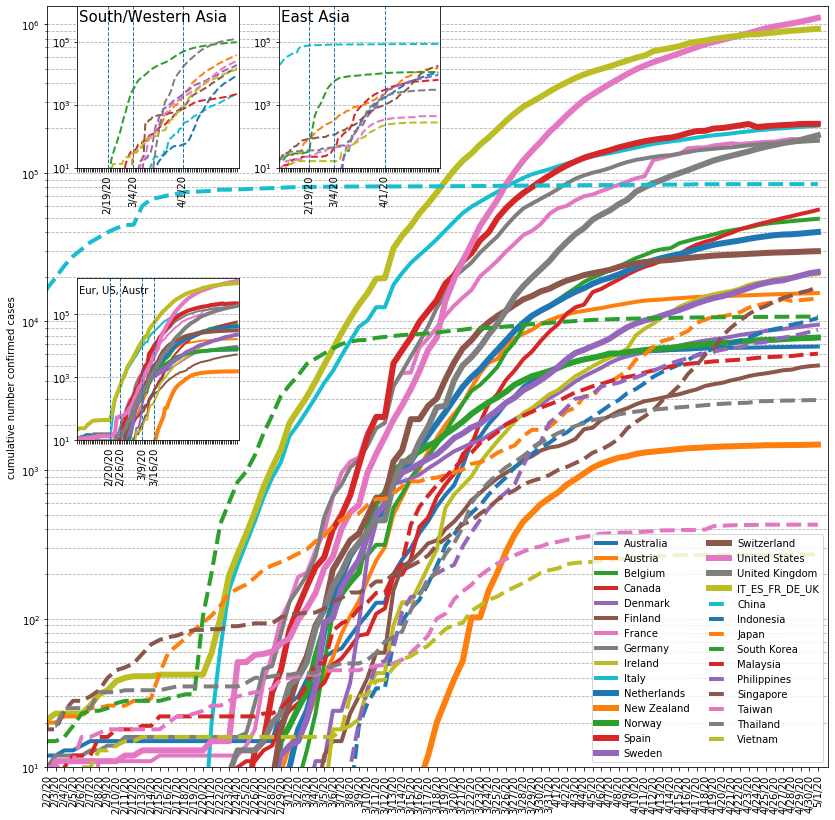

In [100]:
#### PLOT
last_date=covid2020_data_sel.columns[-2]
# set vertical lines
xtl=np.array(covid2020_data_sel.columns)
sel_date=['1/22/20','2/20/20','2/26/20','3/9/20','3/16/20']
xtl[~covid2020_data_sel.columns.str.contains('|'.join(sel_date))]='' # =sel_date
xtl_vertls=np.nonzero(covid2020_data_sel.columns.str.contains('|'.join(sel_date)))[0] # [[range(len(sel_date))]]
# FIGURE SIZE
fig=plt.figure(); ax1=fig.add_subplot(111); fig.set_size_inches(14,14); linewidth_val=4
# MAIN PLOT
# Western cntrs
west_row_inds_num=np.where(west_row_inds)[0]
for i in west_row_inds_num:
    if west_row_inds.index[i] in ['New Zealand','Netherlands','Norway','IT_ES_FR_DE_UK','United States','Sweden',\
                                  'Switzerland','Spain','United Kingdom']:
        ax1.plot(covid2020_data_sel.iloc[i,col_inds].T,linewidth=linewidth_val+2)
    else:
        ax1.plot(covid2020_data_sel.iloc[i,col_inds].T,linewidth=linewidth_val)
# Asian cntrs
ax1.plot(covid2020_data_sel.loc[east_asian_row_inds,col_inds].T,linestyle='--',linewidth=linewidth_val) 
#
plt_inds=np.concatenate([np.where(west_row_inds)[0], np.where(east_asian_row_inds)[0]])
ax1.legend(covid2020_data_sel.index[plt_inds],loc='lower right',ncol=2)
plt.grid(axis='y',which='both',linestyle='--'); plt.xticks(rotation=90); plt.yscale('log')
plt.ylabel("cumulative number confirmed cases") # plt.xlabel("days since 22/jan"); 
xlim_val1=11; plt.xlim(xlim_val1,covid2020_data_sel.columns.size-0.8); 
ymaxval=1.1*np.ceil(np.max(np.max(covid2020_data_sel.iloc[:,:-1]))/1e5)*1e5; 
ylim_vals=[10,ymaxval]; plt.ylim(ylim_vals)
#########################
# INSET Europe/US/AustrNZ
left, bottom, width, height=[0.155, 0.45, 0.16,0.16]; upshift_asia=0.27
ax2=fig.add_axes([left, bottom, width, height])
for i in west_row_inds_num:
    if west_row_inds.index[i] in ['New Zealand','Netherlands','Norway','IT_ES_FR_DE_UK',\
                                            'United States','Sweden','Switzerland','Spain','United Kingdom']:
        ax2.plot(covid2020_data_sel.iloc[i,col_inds].T,linewidth=4)
    else:
        ax2.plot(covid2020_data_sel.iloc[i,col_inds].T,linewidth=2)
ax2.set_yscale('log'); plt.grid(axis='y',which='major',linestyle='--')
plt.xticks(rotation=90); plt.xlim(xlim_val1,covid2020_data_sel.columns.size-1)
ax2.set_xticklabels(xtl); ax2.text(xlim_val1+1,ylim_vals[1]/3,'Eur, US, Austr'); plt.ylim(ylim_vals)
for i in range(len(xtl_vertls)):
    ax2.axvline(xtl_vertls[i],linestyle='--',linewidth=1)
#########################
# INSET East Asia
ax3=fig.add_axes([left+0.20,bottom+upshift_asia, width, height])
for i in range(np.sum(west_row_inds)):
    ax3.plot([0])
ax3.plot(covid2020_data_sel.loc[east_asian_row_inds,col_inds].T,linewidth=2,linestyle='--'); 
ax3.set_yscale('log'); 
plt.xticks(rotation=90); plt.xlim(xlim_val1,covid2020_data_sel.columns.size-1)
ax3.text(xlim_val1+1,ylim_vals[1]/3,'East Asia',fontsize=15)
xtl_empty=np.array(covid2020_data_sel.columns) 
sel_date=['2/19/20','3/4/20','4/1/20']; xtl_empty[~covid2020_data_sel.columns.str.contains('|'.join(sel_date))]=''
ax3.set_xticklabels(xtl_empty); plt.grid(axis='y',which='major',linestyle='--')
xtl_vertls=np.nonzero(covid2020_data_sel.columns.str.contains('|'.join(sel_date)))[0] # [[range(len(sel_date))]]
for i in range(len(xtl_vertls)):
    ax3.axvline(xtl_vertls[i],linestyle='--',linewidth=1)
plt.ylim(ylim_vals)
#########################
# INSET South/West Asia
ax4=fig.add_axes([left,bottom+upshift_asia, width, height])
for i in range(np.sum(west_row_inds|east_asian_row_inds)):
    ax4.plot([0])
south_west_asia_inds=covid2020_data_sel.index.str.contains('|'.join(south_west_asia))
ax4.plot(covid2020_data_sel.loc[south_west_asia_inds,col_inds].T,linewidth=2,linestyle='--'); 
ax4.set_yscale('log'); 
plt.xticks(rotation=90); plt.xlim(xlim_val1,covid2020_data_sel.columns.size-1)
ax4.text(xlim_val1+1,ylim_vals[1]/3,'South/Western Asia',fontsize=15)
ax4.set_xticklabels(xtl_empty); plt.grid(axis='y',which='major',linestyle='--')
for i in range(len(xtl_vertls)):
    ax4.axvline(xtl_vertls[i],linestyle='--',linewidth=1)
plt.ylim(ylim_vals)
#
# plt.savefig("plots/"+filename,bbox_inches='tight',pad_inches=0.15); plt.ylim(ylim_vals)
plt.rc('font',size=14); plt.show()

### World population data

In [45]:
worldpop_filename='worldpop.csv'
urlworldpop='https://github.com/datasets/population/raw/master/data/population.csv'
# urllib.request.urlretrieve(urlworldpop,worldpop_filename)
worldpop=pd.read_csv(worldpop_filename)
# in millions
worldpop["Value"]=worldpop["Value"]/1e6
# last year of data
worldpop2018=worldpop[worldpop['Year']==2018]
# worldpop2018[worldpop2018['Country Name'].str.contains('|'.join(sel_countrs))]

## Plot # of total cases, aligned to start from ~same value

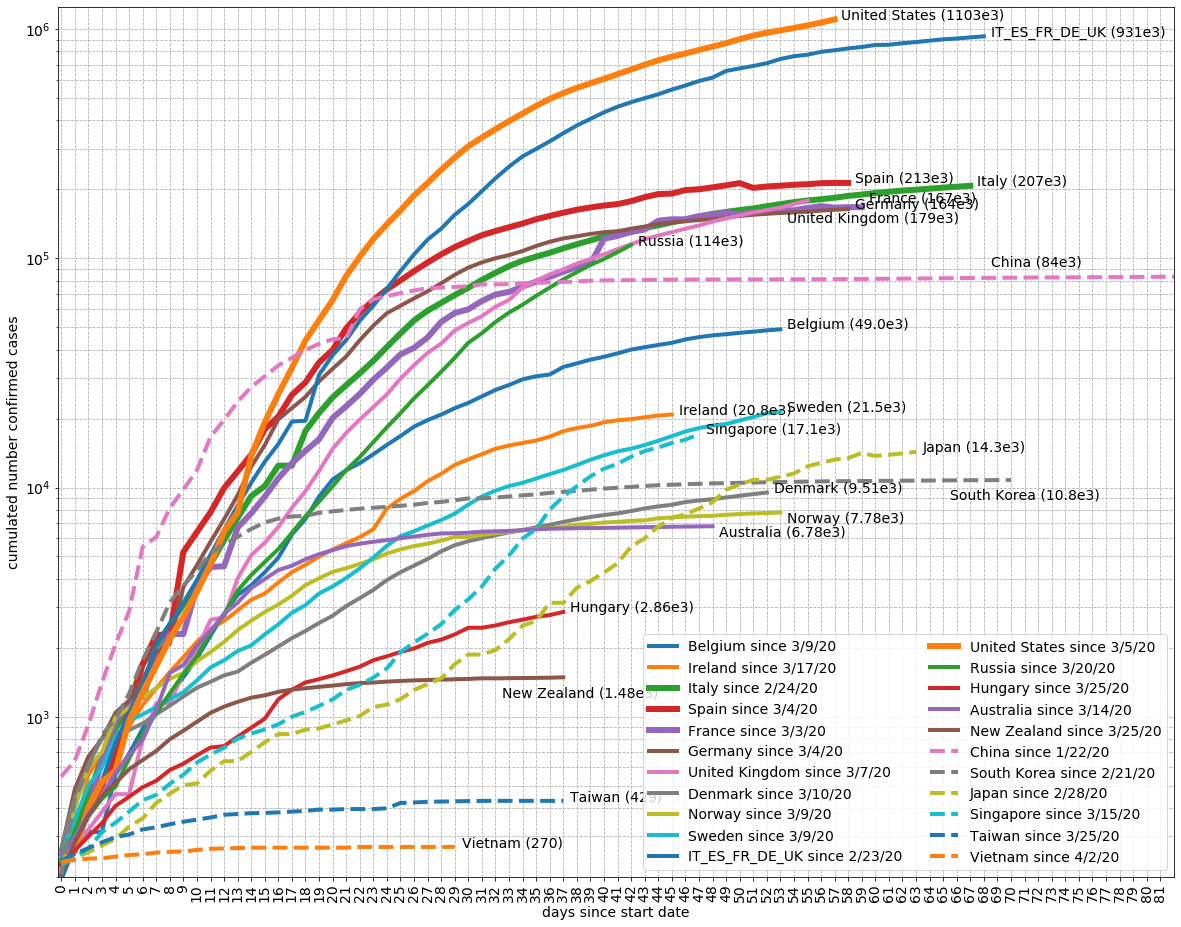

In [103]:
# LOG only, comparison of dynamics for countries
sel_date='2/24/20'
a=np.nonzero(covid2020_data_sel.columns.str.find(sel_date)==0)
cases_italy=covid2020_data_sel.loc['Italy'][np.arange(a[0],covid2020_data_sel.columns.size-1)]
days=np.arange(0,np.size(cases_italy))
ref_value=cases_italy[0]
#
fig=plt.figure(); ax2=fig.add_subplot(111); fig.set_size_inches(20,16)
ymaxval=1.2e6*np.ceil(np.max(np.max(covid2020_data_sel.iloc[:,:-1]))/1e6)
sample_cntrs=['Belgium','Ireland','Italy','Spain','France','Germany','United Kingdom',\
              'Denmark','Norway','Sweden',\
              'IT_ES_FR_DE_UK','United States',\
              'Russia','Hungary','Australia','New Zealand',
              'China','South Korea','Japan','Singapore','Taiwan','Vietnam'] 
####
dashed_cntrs=['China','South Korea','Japan','Singapore','Taiwan','Vietnam']; 
dotted_cntrs=[]; linewidth_incr_cntrs=['Italy','Spain','France','United States']
xlimvals=[0,days.size+14]; ylimvals=[1e2,ymaxval]; xtick_stepval=1; fontsizeval=14; linewidth_vals=[4,6]
log_flag=1; text_flag=1;
posit_modif_cntrs=[['China'],['Australia','Norway'],\
                  ['United Kingdom'],['France'],['South Korea','New Zealand']]
posit_modif_vals=[[-10,1.1],[0,0.9],[-2,0.8],[0,1.05],[-5,0.82]]
####
fcn_plot_aligned(ax2,covid2020_data_sel,[],sample_cntrs,\
                     ref_value,dashed_cntrs,dotted_cntrs,linewidth_incr_cntrs,\
                     xlimvals,ylimvals,xtick_stepval,fontsizeval,linewidth_vals,\
                     log_flag,text_flag,posit_modif_cntrs,posit_modif_vals)
#
last_date=covid2020_data_sel.columns[-2].replace('/','_')
plt.legend(loc='best',ncol=2) # ,bbox_to_anchor=(1.2, 1)
plt.xlabel("days since start date"); plt.ylabel("cumulated number confirmed cases"); 
plt.xticks(np.arange(0,xlimvals[1])); plt.xticks(rotation=90); plt.xlim(-0.25,xlimvals[1]); plt.ylim(2e2,1.25e6)
plt.grid(which='both',linestyle='--'); plt.rc('font',size=14)
plt.savefig("plots/cases_cntrs_aligned_log.png",bbox_inches='tight',pad_inches=0.05) # 

## Case # proportional to population

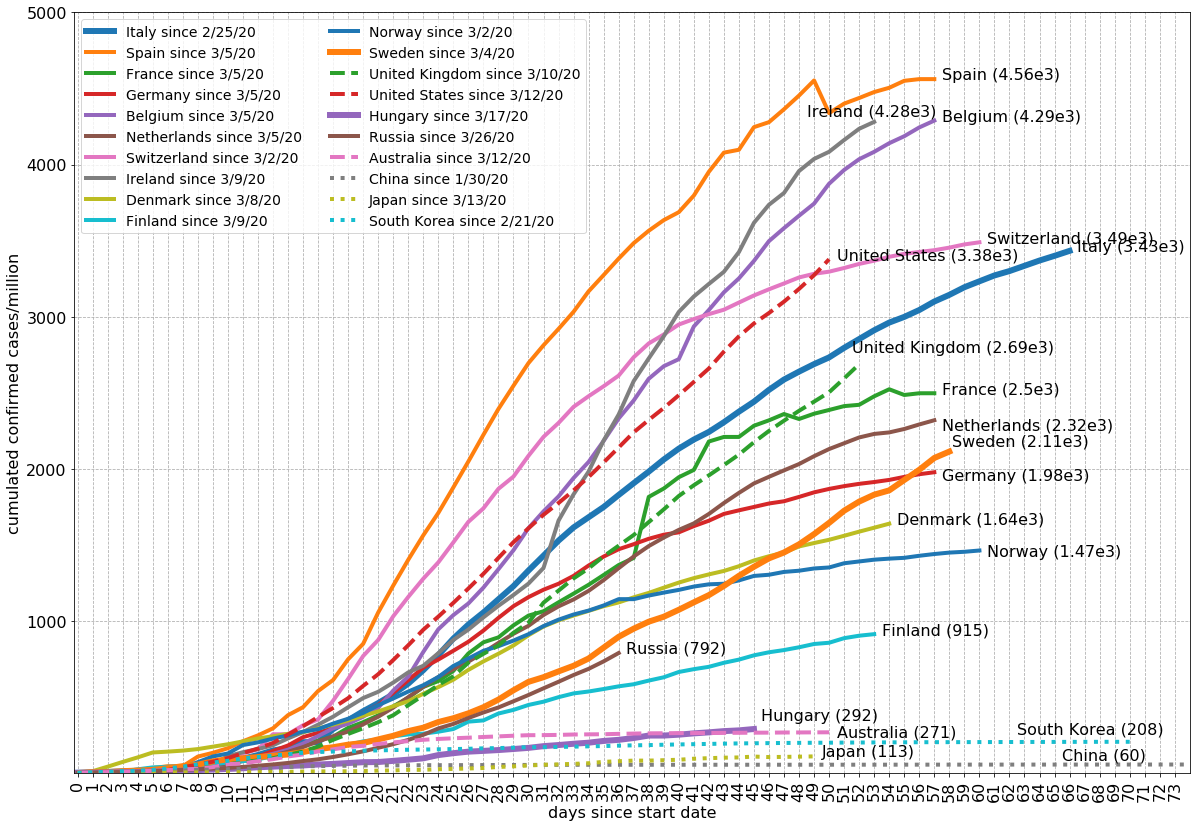

In [105]:
# Start date in italy
sel_date='2/25/20'
a=np.nonzero(covid2020_data_sel.columns.str.find(sel_date)==0)
cases_italy=covid2020_data_sel.loc['Italy'][np.arange(a[0],covid2020_data_sel.columns.size-1)]
pop_it_2018=worldpop2018.loc[worldpop2018['Country Name']=='Italy',"Value"].values[0]
ref_value=cases_it_per_pop=cases_italy[0]/pop_it_2018

sample_cntrs=['Italy','Spain','France','Germany',\
              'Belgium','Netherlands','Switzerland','Ireland',\
              'Denmark','Finland','Norway','Sweden',\
              'United Kingdom','United States',\
              'Hungary','Russia',\
              'Australia','China','Japan','South Korea']
xlimvals=[0,cases_italy.size+7]
dashed_cntrs=['United Kingdom','United States','Australia','New Zealand'];
linewidth_incr_cntrs=['Hungary','Sweden','Italy'];
dotted_cntrs=['China','Japan','South Korea']; 
log_flag=0; text_flag=1;
posit_modif_cntrs=[['Norway','Netherlands','Germany'],['Hungary'],['Australia'],\
                   ['China'],['South Korea'],['United Kingdom'],['Sweden'],['Ireland']]
posit_modif_vals=[[0,0.975],[0,1.2],[0,0.9],[-5,1.5],[-8,1.25],[-1,1.03],[-0.3,1.02],[-5,1.01]]; # 
fig=plt.figure(); ax2=fig.add_subplot(111); fig.set_size_inches(20,14)
fcn_plot_aligned(ax2,covid2020_data_sel,worldpop2018,sample_cntrs,\
                     ref_value,dashed_cntrs,dotted_cntrs,linewidth_incr_cntrs,\
                     xlimvals,ylimvals,xtick_stepval,fontsizeval,linewidth_vals,\
                     log_flag,text_flag,posit_modif_cntrs,posit_modif_vals)
#######
plt.legend(loc='best',ncol=2) # ,bbox_to_anchor=(0,0.16) 
plt.xlabel("days since start date"); plt.ylabel("cumulated confirmed cases/million"); 
plt.xticks(np.arange(0,xlimvals[1])); plt.xticks(rotation=90); 
plt.xlim(-0.25,xlimvals[1]); plt.ylim(2,5e3); 
plt.grid(which='both',linestyle='--'); plt.rc('font',size=16);
####
plt.savefig("plots/cases_cntrs_aligned_perpop.png",bbox_inches='tight',pad_inches=0.05) # 

In [56]:
# INSET
# 

## Plot of growth rate of cumul cases

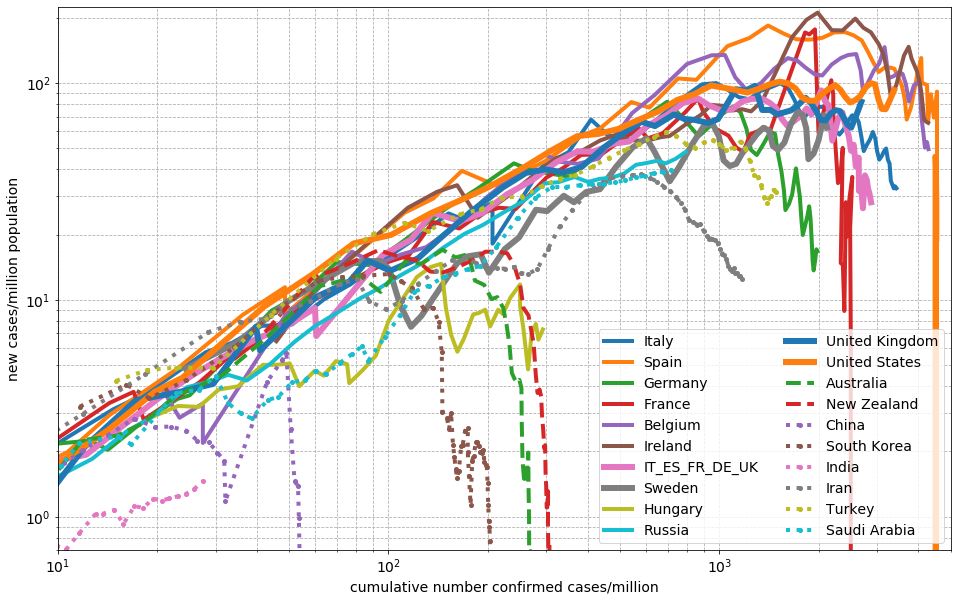

In [108]:
# % GROWTH RATE
cutoff_cases=100
sel_countrs=['Italy','Spain','Germany','France','Belgium','Ireland',\
             'IT_ES_FR_DE_UK','Sweden',\
             'Hungary','Russia',\
             'United Kingdom','United States','Australia','New Zealand',\
             'China','South Korea','India','Iran','Turkey','Saudi Arabia']
cntr_truthval=covid2020_data_sel.index.str.contains('|'.join(sel_countrs))
maxval=np.max(np.max(covid2020_data_sel.loc[cntr_truthval].iloc[:,:-1]))

# GROWTH on total number of cases or on population?
growth_rate_flag='popul' # 'cumul','population'
fig=plt.figure(); ax1=fig.add_subplot(111); fig.set_size_inches(16,10)
############
dotted_cntrs=['China','South Korea','India','Turkey','Iran','Saudi Arabia']; 
thickline_cntrs=['United Kingdom','IT_ES_FR_DE_UK','United States','Sweden']
dashed_cntrs=['Australia','New Zealand']
markervals=['','o']; linewidth_vals=[4,6]; growth_rate_flag='popul'
###
loglog_flag=[1,1]; n_aver=3
xlim_vals=[1e1,5e3]; ylim_vals=[0.7,2.25e2]; str_dtype="cases" # 1e-1,2.25e2
fcn_plot_growth_rate(covid2020_data_sel,worldpop2018,sel_countrs,cutoff_cases,growth_rate_flag,n_aver,\
                        dotted_cntrs,thickline_cntrs,dashed_cntrs,markervals,linewidth_vals,\
                        loglog_flag,xlim_vals,ylim_vals,str_dtype)
plt.grid(which='both',linestyle='--'); plt.legend(loc='best',ncol=2) # ,bbox_to_anchor=(0,0.09)
plt.rc('font',size=14)
######
ylog_flag_str='_xlog'; 
if loglog_flag[1]: ylog_flag_str='_loglog'

save_flag=1
if save_flag:
    if 'popul' in growth_rate_flag:
        filename_rate="plots/growth_rate_cases_popul_cutoff"+str(cutoff_cases)+ylog_flag_str+".png"
        plt.savefig(filename_rate,bbox_inches='tight',pad_inches=0.05)
    elif 'cumul' in growth_rate_flag:
        filename_deathrate="plots/growth_rate_cases_cumul_cutoff"+str(cutoff_cases)+".png"
        plt.savefig(filename_rate,bbox_inches='tight',pad_inches=0.05)

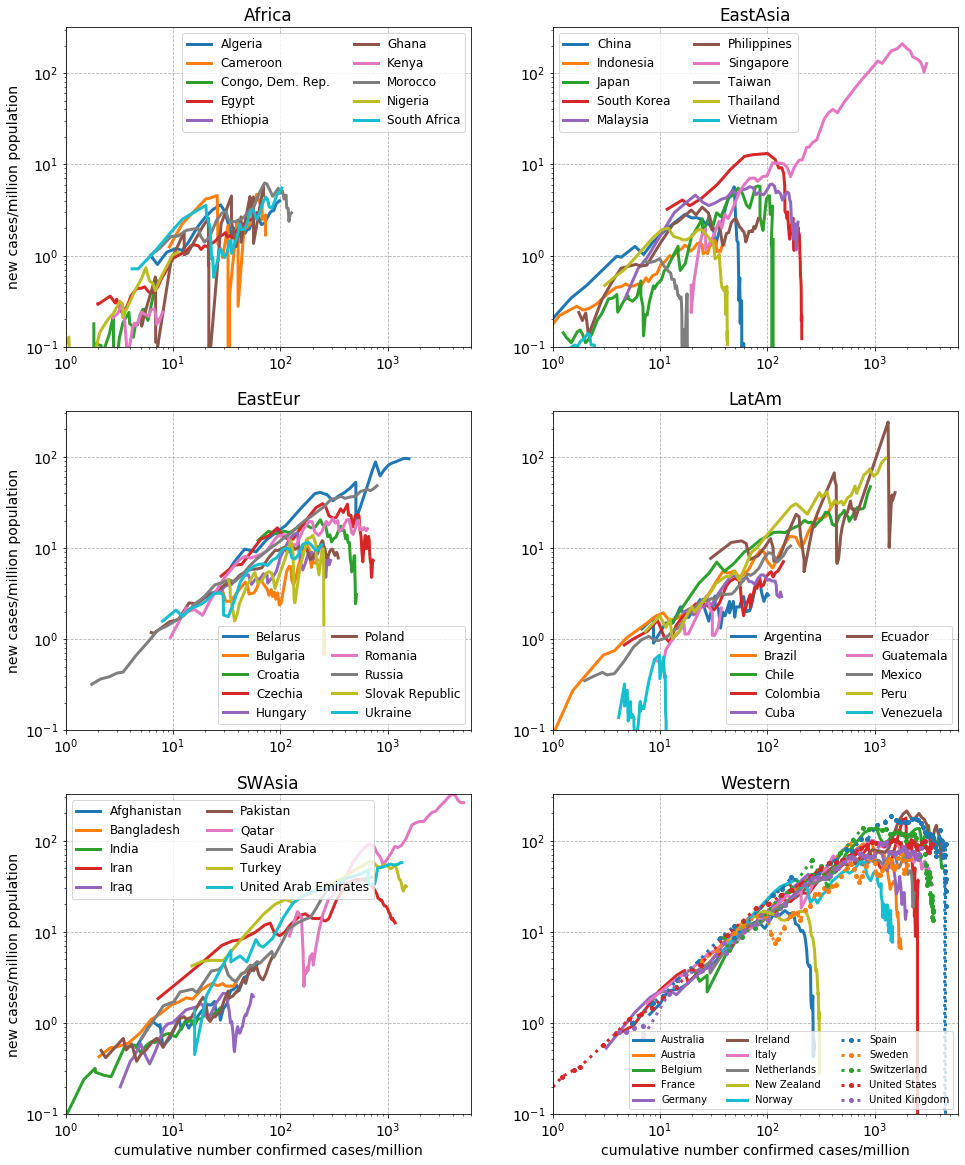

In [118]:
### several subplots
dotted_cntrs=[];thickline_cntrs=[];dashed_cntrs=[]; 
xlim_vals=[1e0,6e3];ylim_vals=[1e-1,3.2e2]; linewidth_vals=[3,5]; 
#####
# LOGLOG?
loglog_flag=[1,1]
all_cntr_categs=np.unique(covid2020_data_sel.Continent)
# [western_cntrs,eastern_eur_cntrs,east_asian_cntrs,south_west_asia,latin_am_cntrs,afr_cntrs]
fig=plt.figure(); fig.set_size_inches(16,20)
for i in range(len(all_cntr_categs)):
    ax1=fig.add_subplot(3,2,i+1); 
    sel_cntrs=list(covid2020_data_sel.index[covid2020_data_sel.Continent.str.contains(all_cntr_categs[i])])
    ncolval=2; fontval=12; str_dtype='cases'
    sel_cntrs=[sel_cntrs[i] for i in range(len(sel_cntrs)) if not sel_cntrs[i] in \
               ['Canada','IT_ES_FR_DE_UK','Denmark','Finland']]
    if len(sel_cntrs)>10: 
        dotted_cntrs=sel_cntrs[10:]; fontval=10
        if loglog_flag[1]: ncolval=3;
    fcn_plot_growth_rate(covid2020_data_sel,worldpop2018,sel_cntrs,cutoff_cases,growth_rate_flag,n_aver,\
                        dotted_cntrs,thickline_cntrs,dashed_cntrs,markervals,linewidth_vals,\
                        loglog_flag,xlim_vals,ylim_vals,str_dtype)
    plt.grid(which='major',linestyle='--'); plt.title(all_cntr_categs[i]); 
    plt.legend(loc='best',ncol=ncolval,prop={"size":fontval}) # ,bbox_to_anchor=(0,0.09)
    if i<4: plt.xlabel('')
    if np.remainder(i,2)==1: plt.ylabel('')
# plt.rc('font',size=14); 
######
# SAVE
save_flag=0
filename='multiplot_growth_rate_cases_popul_cutoff100_'; pdf_png='.png' # '.png' pdf
if save_flag:
    if loglog_flag[1]:
        plt.savefig('plots/'+filename+'loglog'+pdf_png,bbox_inches='tight',pad_inches=0.05)
    else:
        plt.savefig('plots/'+filename+'xlog'+pdf_png,bbox_inches='tight',pad_inches=0.05)

In [30]:
# covid2020_data_sel.iloc[-15:,-5:]

In [92]:
str_dtype

'deaths'

# Load data on number of deaths

In [133]:
# Deaths
url='https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
filename_covid_timeseries='time_series_covid19_deaths_global.csv'
urllib.request.urlretrieve(url,filename_covid_timeseries)
covid2020_deaths=pd.read_csv(filename_covid_timeseries)

# filter
# ['Italy','Spain',\ 'Australia','New Zealand']

western_cntrs=['Austria','Switzerland','Belgium','Netherlands','Italy','Spain','France','Germany',\
               'United Kingdom','Ireland',\
               'Canada','US',\
               'Norway','Denmark','Finland','Sweden',\
               'Zealand','Australia'] 
eastern_eur_cntrs=['Czechia','Hungary','Poland','Russia','Ukraine','Romania','Croatia',\
                   'Belarus','Bulgaria','Slovakia']
east_asian_cntrs=['Korea','Japan','China','Singapore','Taiwan','Thailand','Vietnam',\
             'Indonesia','Thailand','Malaysia','Philippines']
south_west_asia=['Bangladesh','India','Pakistan','Afghanistan','Iran','Turkey',\
                 'Iraq','Saudi Arabia','Qatar','United Arab Emirates']
latin_am_cntrs=['Argentina','Brazil','Colombia','Mexico','Peru','Venezuela','Chile','Ecuador','Guatemala','Cuba']
afr_cntrs=['Nigeria','Ethiopia','Egypt','South Africa','Algeria','Kenya','Morocco','Congo','Ghana','Cameroon']
# 
countries=western_cntrs+eastern_eur_cntrs+east_asian_cntrs+south_west_asia+latin_am_cntrs+afr_cntrs
#####
covid2020_deaths_sel=covid2020_deaths[covid2020_deaths['Country/Region'].str.contains('|'.join(countries))]
covid2020_deaths_sel=covid2020_deaths_sel.groupby(['Country/Region']).sum()
remove_cols=covid2020_deaths_sel.columns.str.contains('|'.join(['Lat','Long']))
covid2020_deaths_sel=covid2020_deaths_sel.iloc[:,~remove_cols]
str_IT_ES_FR_DE_UK=['Italy','Spain','France','Germany','United Kingdom']
# sum of EU big 5
covid2020_deaths_sel.loc['IT_ES_FR_DE_UK']=\
np.sum(covid2020_deaths_sel.iloc[covid2020_deaths_sel.index.str.contains('|'.join(str_IT_ES_FR_DE_UK)),:])
if not('IT_ES_FR_DE_UK' in western_cntrs): 
    western_cntrs.append('IT_ES_FR_DE_UK')
# renamings
# remove Brazzaville Congo: 
covid2020_deaths_sel=covid2020_deaths_sel[~covid2020_deaths_sel.index.str.contains('Brazzaville')]
covid2020_deaths_sel.rename(index={'Taiwan*': 'Taiwan'},inplace=True)
covid2020_deaths_sel.rename(index={'US': 'United States'},inplace=True)
covid2020_deaths_sel.rename(index={'Slovakia': 'Slovak Republic'},inplace=True)
western_cntrs[western_cntrs.index('US')]='United States'
eastern_eur_cntrs[eastern_eur_cntrs.index('Slovakia')]='Slovak Republic'
covid2020_deaths_sel.rename(index={'Korea, South': 'South Korea'},inplace=True);
east_asian_cntrs[east_asian_cntrs.index('Korea')]='South Korea'
covid2020_deaths_sel.rename(index={'Congo (Kinshasa)': 'Congo, Dem. Rep.'},inplace=True);
afr_cntrs[afr_cntrs.index('Congo')]='Congo, Dem. Rep.'


### Plot of # of cumulative (total) deaths, aligned to start from same level

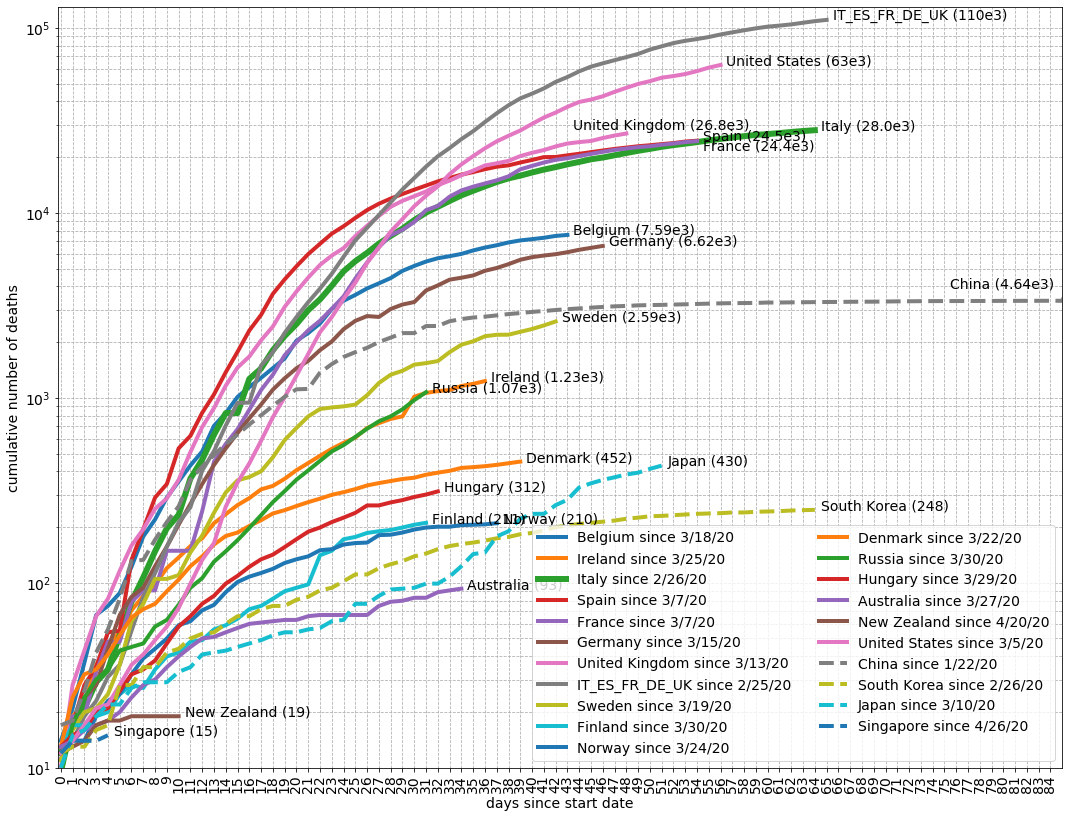

In [122]:
# total deaths
# LOG only, comparison of dynamics for countries
sel_date='2/26/20'
a=np.nonzero(covid2020_deaths_sel.columns.str.find(sel_date)==0)
cases_italy=covid2020_deaths_sel.loc['Italy'][np.arange(a[0],covid2020_deaths_sel.columns.size-1)]
days=np.arange(0,np.size(cases_italy))
ref_value=cases_italy[0]

fig=plt.figure(); ax2=fig.add_subplot(111); fig.set_size_inches(18,14)
sample_cntrs=['Belgium','Ireland','Italy','Spain','France','Germany','United Kingdom',\
              'IT_ES_FR_DE_UK',\
              'Sweden','Finland','Norway','Denmark',\
              'Russia','Hungary',\
              'Australia','New Zealand','United States',\
              'China','South Korea','Japan','Singapore']
dashed_cntrs=['China','South Korea','Japan','Singapore']; dotted_cntrs=[];linewidth_incr_cntrs='Italy'
xlimvals=[-0.25,days.size+20]; ylimvals=[1e1,1e5]; xtick_stepval=1; fontsizeval=14;linewidth_vals=[4,6]
log_flag=1; text_flag=1; 
posit_modif_cntrs=[['China'],['France'],['United Kingdom']]; posit_modif_vals=[[-6,0.85],[0,0.9],[-5,1.05]]
fcn_plot_aligned(ax2,covid2020_deaths_sel,[],sample_cntrs,\
                     ref_value,dashed_cntrs,dotted_cntrs,linewidth_incr_cntrs,\
                     xlimvals,ylimvals,xtick_stepval,fontsizeval,linewidth_vals,\
                     log_flag,text_flag,posit_modif_cntrs,posit_modif_vals)
plt.legend(loc='best',ncol=2) # ,bbox_to_anchor=(1.2, 1)
plt.xlabel("days since start date"); plt.ylabel("cumulative number of deaths"); 
plt.xticks(np.arange(0,xlimvals[1])); plt.xticks(rotation=90)
plt.xlim(-0.25,xlimvals[1]); plt.ylim(1e1,1.3e5)
plt.grid(which='both',linestyle='--')
plt.savefig("plots/deaths_cntrs_aligned_log.png",bbox_inches='tight',pad_inches=0.05)

## Proportional to population (fatalities)

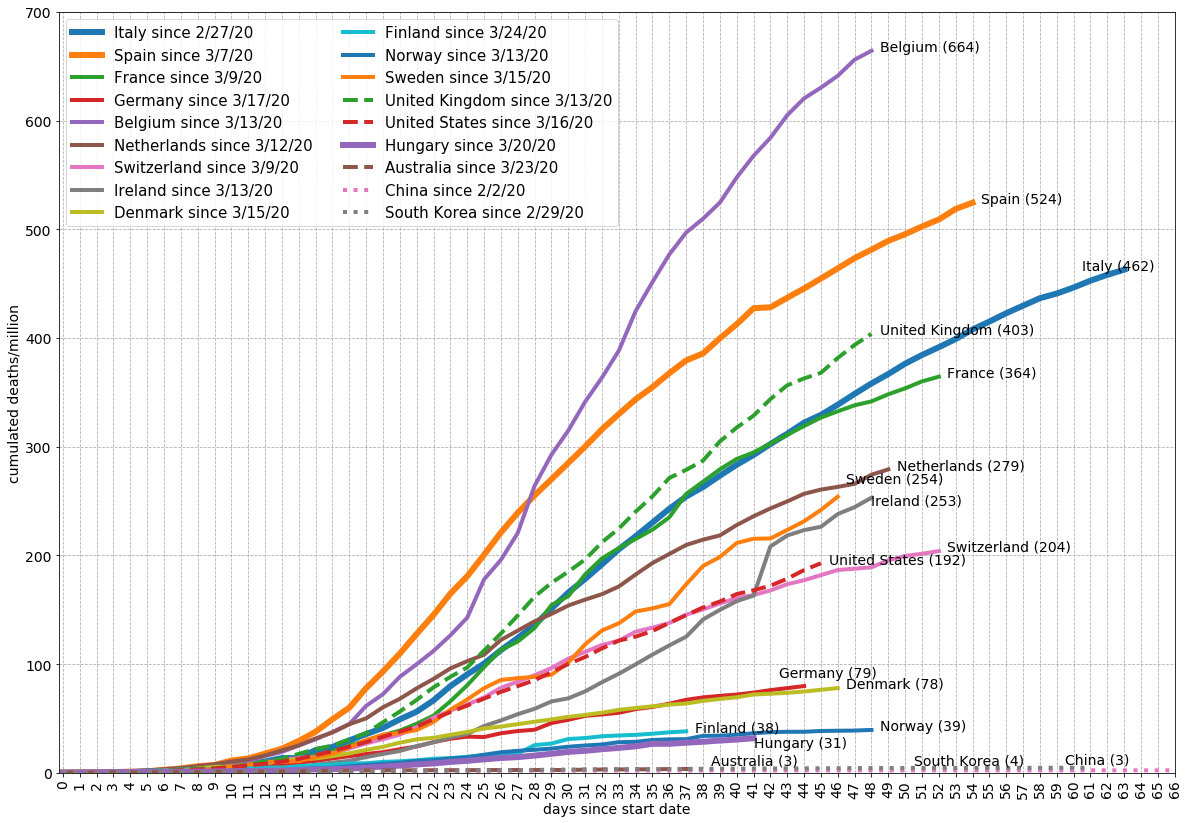

In [125]:
# proportional to population
worldpop2018=worldpop[worldpop['Year']==2018]
pop_it_2018=worldpop2018.loc[worldpop2018['Country Name']=='Italy',"Value"].values[0]

# start date in italy
sel_date='2/27/20'; a=np.nonzero(covid2020_deaths_sel.columns.str.find(sel_date)==0)
cases_italy=covid2020_deaths_sel.loc['Italy'][np.arange(a[0],covid2020_deaths_sel.columns.size-1)]
xlimvals=[-0.25,cases_italy.size]; ylimvals=[0.3,6e2]; xlimval=xlimvals[1];
xtick_stepval=1; fontsizeval=15; linewidth_vals=[4,6]
ref_value=cases_italy[0]/pop_it_2018; log_flag=0; text_flag=1

sample_cntrs=['Italy','Spain','France','Germany',\
              'Belgium','Netherlands','Switzerland','Ireland',\
              'Denmark','Finland','Norway','Sweden',\
              'United Kingdom','United States',\
              'Hungary',\
              'Australia','China','South Korea']
dashed_cntrs=['United Kingdom','United States','Australia','New Zealand']; 
dotted_cntrs=['China','South Korea'];
linewidth_incr_cntrs=['Italy','Spain','Hungary'] 
posit_modif_cntrs=[['Sweden'],['Australia','New Zealand'],['Germany'],['Ireland'],['China'],['South Korea'],\
                  ['Hungary']]
posit_modif_vals=[[0,1.05],[0,2],[-2,1.1],[-0.5,0.975],[-1,2.5],[-10,1.5],[-0.5,0.75]]
fig=plt.figure(); ax=fig.add_subplot(111); fig.set_size_inches(20,14)
fcn_plot_aligned(ax,covid2020_deaths_sel,worldpop2018,sample_cntrs,\
                     ref_value,dashed_cntrs,dotted_cntrs,linewidth_incr_cntrs,\
                     xlimvals,ylimvals,xtick_stepval,fontsizeval,linewidth_vals,\
                     log_flag,text_flag,posit_modif_cntrs,posit_modif_vals)
##
plt.legend(loc='best',ncol=2) # lower left ,bbox_to_anchor=(0,0.05)
plt.xlabel("days since start date"); plt.ylabel("cumulated deaths/million"); 
plt.xticks(np.arange(0,xlimvals[1]+3)); # plt.xticks(rotation=90); 
plt.xlim(-0.25,xlimvals[1]+2); plt.ylim(0,7e2); plt.grid(which='both',linestyle='--'); plt.rc('font',size=14)
################
# INSET
"""
left, bottom, width, height=[0.16,0.61,0.3,0.261]
ax3=fig.add_axes([left,bottom,width,height]); 
log_flag=1; ylimvals=[0.3,6e2]; xtick_stepval=4;fontsizeval=15; text_flag=0
fcn_plot_aligned(ax3,covid2020_deaths_sel,worldpop2018,sample_cntrs,\
                     ref_value,dashed_cntrs,dotted_cntrs,linewidth_incr_cntrs,\
                     xlimvals,ylimvals,xtick_stepval,fontsizeval,linewidth_vals,\
                     log_flag,text_flag,[],[])
ax3.set_ylim([0.3,1e3]); plt.xticks(np.arange(0,xlimval,step=4)); plt.xticks(rotation=90); 
plt.xlim(-0.25,xlimval-12); plt.grid(which='major',linestyle='--'); plt.rc('font',size=16)
"""
plt.savefig("plots/deaths_cntrs_aligned_perpop.png",bbox_inches='tight',pad_inches=0.05) # 

## Growth rate of deaths

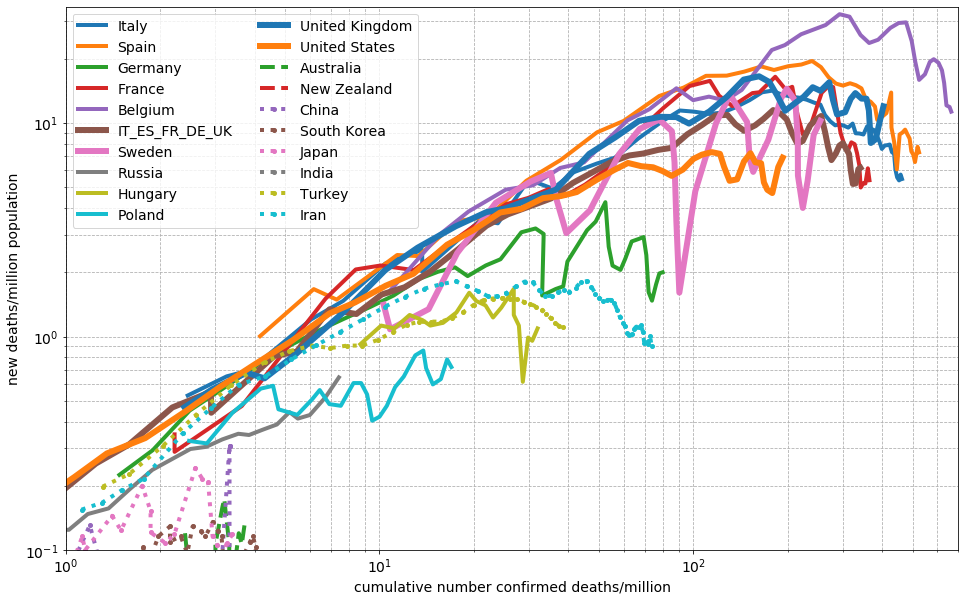

In [127]:
############
# % GROWTH RATE
cutoff_cases=50 # 'Switzerland','Ireland'
sel_countrs=['Italy','Spain','Germany','France',\
             'Belgium',\
             'IT_ES_FR_DE_UK',\
             'Sweden',\
             'Russia','Hungary','Poland',\
             'United Kingdom','United States',\
             'Australia','New Zealand',\
             'China','South Korea','Japan','India','Turkey','Iran']
cntr_truthval=covid2020_deaths_sel.index.str.contains('|'.join(sel_countrs))
maxval=np.max(np.max(covid2020_deaths_sel.loc[cntr_truthval].iloc[:,:-1]))
# GROWTH on total number of cases or on population?
growth_rate_flag='popul' # 'cumul','population'
fig=plt.figure(); ax1=fig.add_subplot(111); fig.set_size_inches(16,10)
############
dotted_cntrs=['China','South Korea','India','Japan','Turkey','Iran'];
thickline_cntrs=['IT_ES_FR_DE_UK','United States','Sweden','United Kingdom']
dashed_cntrs=['United Kingdom','Australia','New Zealand']
markervals=['','o']; linewidth_vals=[4,6]
growth_rate_flag='popul'; 
####
# LOGLOG?
loglog_flag=[1,1]
xlim_vals=[1,7e2]; ylim_vals=[1e-1,35] # [0,35] # [0.7,2.25e2]; 
str_dtype="deaths" # 1e-1,2.25e2
fcn_plot_growth_rate(covid2020_deaths_sel,worldpop2018,sel_countrs,cutoff_cases,growth_rate_flag,n_aver,\
                        dotted_cntrs,thickline_cntrs,dashed_cntrs,markervals,linewidth_vals,\
                        loglog_flag,xlim_vals,ylim_vals,str_dtype)
ylog_flag_str='_xlog'
if loglog_flag[1]: ylog_flag_str='_loglog'
plt.grid(which='both',linestyle='--'); plt.legend(loc='best',ncol=2) # ,bbox_to_anchor=(0,0.09)
plt.rc('font',size=14)

if loglog_flag[1]: ylog_flag_str='_loglog'
save_flag=0
if save_flag:
    if 'popul' in growth_rate_flag:
        filename_deathrate="plots/growth_rate_deaths_popul_cutoff"+str(cutoff_cases)+ylog_flag_str+".png"
        plt.savefig(filename_deathrate,bbox_inches='tight',pad_inches=0.05)
    elif 'cumul' in growth_rate_flag:
        filename_deathrate="plots/growth_rate_deaths_cumul_cutoff"+str(cutoff_cases)+".png"
        plt.savefig(filename_deathrate,bbox_inches='tight',pad_inches=0.05)

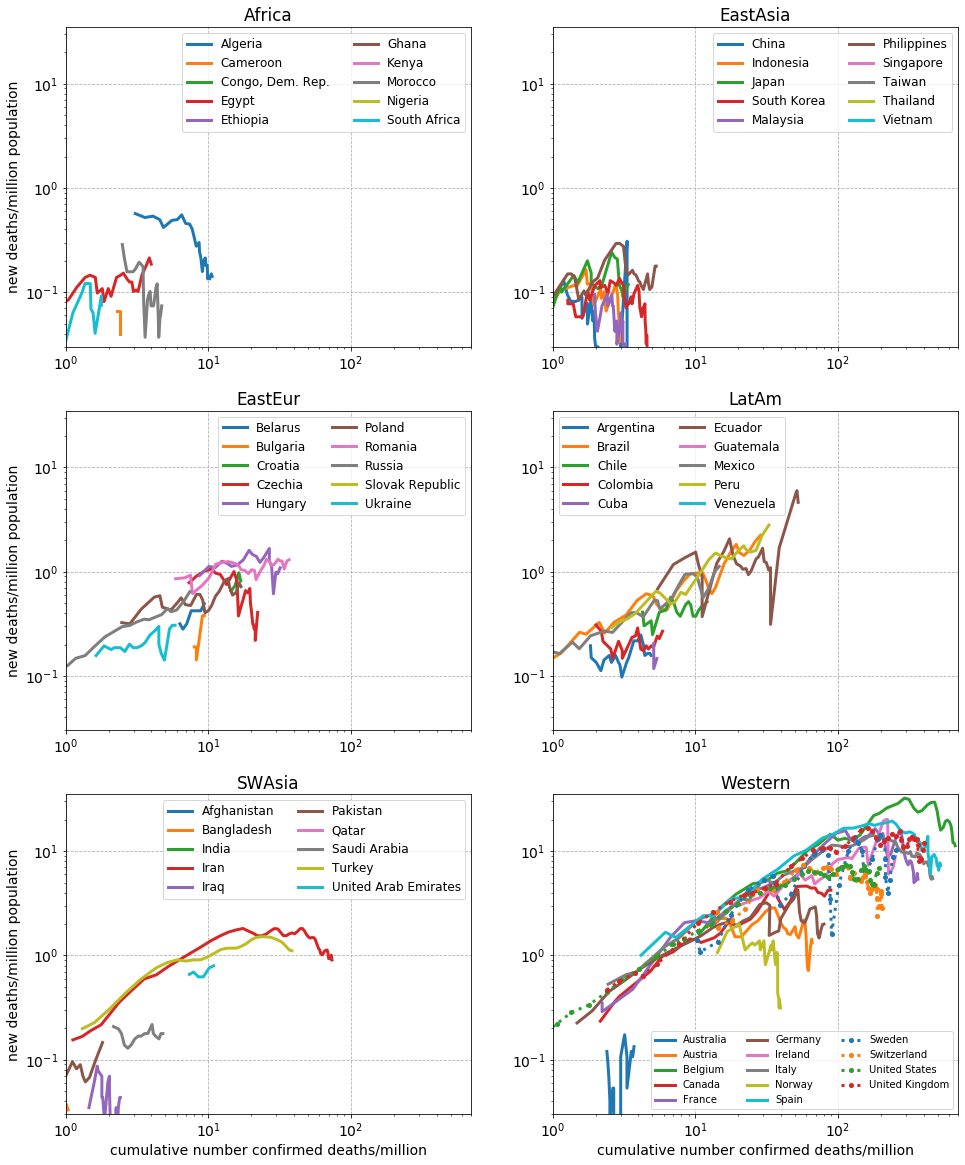

In [137]:
### several subplots
dotted_cntrs=[];thickline_cntrs=[];dashed_cntrs=[]; 
xlim_vals=[1e0,7e2]; ylim_vals=[3e-2,3.5e1]; 
linewidth_vals=[3,5]; cutoff_cases=50
############
# Y axis log?
loglog_flag=[1,1]
############
all_cntr_categs=np.unique(covid2020_data_sel.Continent)
fig=plt.figure(); fig.set_size_inches(16,20)
for i in range(len(all_cntr_categs)):
    ax1=fig.add_subplot(3,2,i+1); 
    sel_cntrs=list(covid2020_data_sel.index[covid2020_data_sel.Continent.str.contains(all_cntr_categs[i])])
    ncolval=2; fontval=12;
    sel_cntrs=[sel_cntrs[i] for i in range(len(sel_cntrs)) if not sel_cntrs[i] in \
               ['Netherlands','IT_ES_FR_DE_UK','Denmark','Finland','New Zealand']]
    if len(sel_cntrs)>10:
        dotted_cntrs=sel_cntrs[10:]; fontval=10
        if loglog_flag[1]: ncolval=3;
    fcn_plot_growth_rate(covid2020_deaths_sel,worldpop2018,sel_cntrs,cutoff_cases,growth_rate_flag,n_aver,\
                        dotted_cntrs,thickline_cntrs,dashed_cntrs,markervals,linewidth_vals,\
                        loglog_flag,xlim_vals,ylim_vals,str_dtype)
    plt.grid(which='major',linestyle='--'); plt.title(all_cntr_categs[i]); 
    plt.legend(loc='best',ncol=ncolval,prop={"size":fontval}) # ,bbox_to_anchor=(0,0.09)
    if i<4: plt.xlabel('')
    if np.remainder(i,2)==1: plt.ylabel('')
# plt.rc('font',size=14); 
######
# SAVE
save_flag=1
filename='multiplot_growth_rate_deaths_popul_cutoff100_'; pdf_png='.pdf' # '.png' '.pdf'
if save_flag:
    if loglog_flag[1]:
        plt.savefig('plots/'+filename+'loglog'+pdf_png,bbox_inches='tight',pad_inches=0.05)
    else:
        plt.savefig('plots/'+filename+'xlog'+pdf_png,bbox_inches='tight',pad_inches=0.05)